# Testing Notebook for MNIST

## Importing Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polyKAN
from polyKAN import KANLayer
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler



## Define Model for PolyKAN

### Network Structure

In [2]:
class PolyNet(nn.Module):
    def __init__(self,poly_type):
        super(PolyNet, self).__init__()
        self.polynet = poly_type
        self.layer1 = KANLayer(28*28, 32, 4,self.polynet,3,3)
        self.ln1 = nn.LayerNorm(32)
        self.layer2 = KANLayer(32, 16, 4,self.polynet,3,3)
        self.ln2 = nn.LayerNorm(16)
        self.layer = KANLayer(16, 10, 4,self.polynet,3,3)
        

    def forward(self, x):
        x = self.layer1(x)
        x = self.ln1(x)
        x = self.layer2(x)
        x = self.ln2(x)
        x = self.layer(x)
        return x
        


### Create different Poly models

In [ ]:
# make 'chebyshev', 'bessel', 'fibonacci', 'gegenbauer', 'hermite', 'jacobi', 'laguerre', and 'legendre' models
chebyshev_model = PolyNet('chebyshev')
bessel_model = PolyNet('bessel')
fibonacci_model = PolyNet('fibonacci')
gegenbauer_model = PolyNet('gegenbauer')
hermite_model = PolyNet('hermite')
jacobi_model = PolyNet('jacobi')
laguerre_model = PolyNet('laguerre')
legendre_model = PolyNet('legendre')


## Training

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

chebyshev_model.to(device)
bessel_model.to(device)
fibonacci_model.to(device)
gegenbauer_model.to(device)
hermite_model.to(device)
jacobi_model.to(device)
laguerre_model.to(device)
legendre_model.to(device)

chebyshev_model_params = sum(p.numel() for p in chebyshev_model.parameters() if p.requires_grad)
bessel_model_params = sum(p.numel() for p in bessel_model.parameters() if p.requires_grad)
fibonacci_model_params = sum(p.numel() for p in fibonacci_model.parameters() if p.requires_grad)
gegenbauer_model_params = sum(p.numel() for p in gegenbauer_model.parameters() if p.requires_grad)
hermite_model_params = sum(p.numel() for p in hermite_model.parameters() if p.requires_grad)
jacobi_model_params = sum(p.numel() for p in jacobi_model.parameters() if p.requires_grad)
laguerre_model_params = sum(p.numel() for p in laguerre_model.parameters() if p.requires_grad)
legendre_model_params = sum(p.numel() for p in legendre_model.parameters() if p.requires_grad)

print(f"Chebyshev model trainable parameters: {chebyshev_model_params}")
print(f"Bessel model trainable parameters: {bessel_model_params}")
print(f"Fibonacci model trainable parameters: {fibonacci_model_params}")
print(f"Gegenbauer model trainable parameters: {gegenbauer_model_params}")
print(f"Hermite model trainable parameters: {hermite_model_params}")
print(f"Jacobi model trainable parameters: {jacobi_model_params}")
print(f"Laguerre model trainable parameters: {laguerre_model_params}")
print(f"Legendre model trainable parameters: {legendre_model_params}")


criterion = nn.CrossEntropyLoss()

Chebyshev model trainable parameters: 128896
Bessel model trainable parameters: 128896
Fibonacci model trainable parameters: 128896
Gegenbauer model trainable parameters: 128896
Hermite model trainable parameters: 128896
Jacobi model trainable parameters: 128896
Laguerre model trainable parameters: 128896
Legendre model trainable parameters: 128896


In [5]:


def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    
    for idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        if isinstance(optimizer, optim.LBFGS):
            def closure():
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                return loss
            loss = optimizer.step(closure)
        else:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss = loss.item()
            
        total_loss += loss
        
    return total_loss / len(train_loader)

def validate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    return total_loss / len(test_loader), correct / len(test_loader.dataset)

In [ ]:

def train_model(model, epochs):
    train_losses = []
    test_losses = []
    optimizer = optim.Adam(model.parameters(), lr=0.0002)
    
    print(f'Training {model.polynet} model')
    for epoch in range(epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = validate(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}')
    return train_losses, test_losses


epochs = 30

chebyshev_train_losses, chebyshev_test_losses = train_model(chebyshev_model, epochs)
bessel_train_losses, bessel_test_losses = train_model(bessel_model, epochs)
fibonacci_train_losses, fibonacci_test_losses = train_model(fibonacci_model, epochs)
gegenbauer_train_losses, gegenbauer_test_losses = train_model(gegenbauer_model, epochs)
hermite_train_losses, hermite_test_losses = train_model(hermite_model, epochs)
jacobi_train_losses, jacobi_test_losses = train_model(jacobi_model, epochs)
laguerre_train_losses, laguerre_test_losses = train_model(laguerre_model, epochs)
legendre_train_losses, legendre_test_losses = train_model(legendre_model, epochs)


Training chebyshev model
Epoch 1, Train Loss: 0.0956, Test Loss: 0.1460, Test Acc: 0.96
Epoch 2, Train Loss: 0.0850, Test Loss: 0.1263, Test Acc: 0.96
Epoch 3, Train Loss: 0.0766, Test Loss: 0.1207, Test Acc: 0.96
Epoch 4, Train Loss: 0.0661, Test Loss: 0.1363, Test Acc: 0.96
Epoch 5, Train Loss: 0.0606, Test Loss: 0.1160, Test Acc: 0.97
Epoch 6, Train Loss: 0.0565, Test Loss: 0.1247, Test Acc: 0.96
Epoch 7, Train Loss: 0.0552, Test Loss: 0.1172, Test Acc: 0.97
Epoch 8, Train Loss: 0.0444, Test Loss: 0.1143, Test Acc: 0.96
Epoch 9, Train Loss: 0.0430, Test Loss: 0.1332, Test Acc: 0.96
Epoch 10, Train Loss: 0.0406, Test Loss: 0.1241, Test Acc: 0.97
Epoch 11, Train Loss: 0.0378, Test Loss: 0.1113, Test Acc: 0.97
Epoch 12, Train Loss: 0.0330, Test Loss: 0.1146, Test Acc: 0.97
Epoch 13, Train Loss: 0.0317, Test Loss: 0.1447, Test Acc: 0.96
Epoch 14, Train Loss: 0.0296, Test Loss: 0.1259, Test Acc: 0.97
Epoch 15, Train Loss: 0.0273, Test Loss: 0.1442, Test Acc: 0.96
Epoch 16, Train Loss: 0.

In [12]:
print(len(chebyshev_train_losses))

30


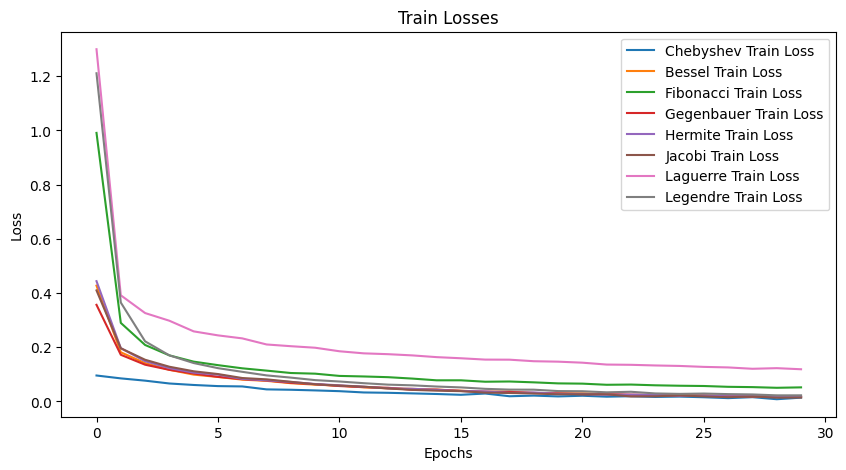

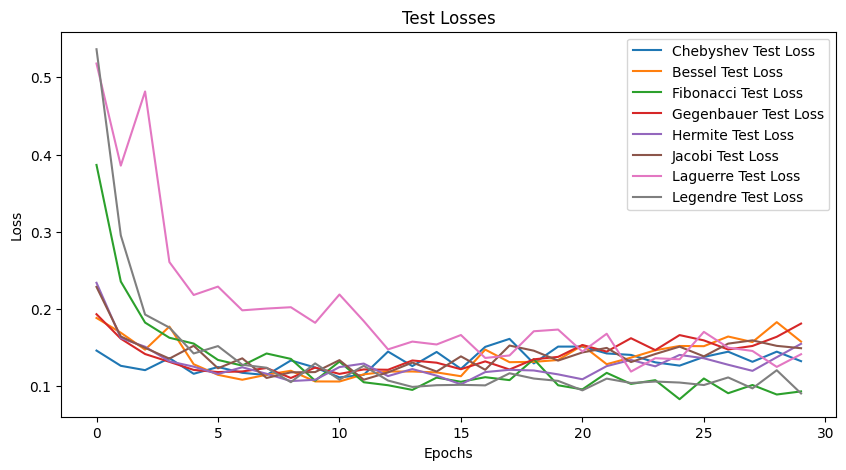

In [ ]:
import matplotlib.pyplot as plt
# plot the training losses vs epochs for each model
plt.figure(figsize=(10, 5))
plt.plot(chebyshev_train_losses, label='Chebyshev Train Loss')
plt.plot(bessel_train_losses, label='Bessel Train Loss')
plt.plot(fibonacci_train_losses, label='Fibonacci Train Loss')
plt.plot(gegenbauer_train_losses, label='Gegenbauer Train Loss')
plt.plot(hermite_train_losses, label='Hermite Train Loss')
plt.plot(jacobi_train_losses, label='Jacobi Train Loss')
plt.plot(laguerre_train_losses, label='Laguerre Train Loss')
plt.plot(legendre_train_losses, label='Legendre Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train Losses')
plt.show()
# plot the test losses vs epochs for each model
plt.figure(figsize=(10, 5))
plt.plot(chebyshev_test_losses, label='Chebyshev Test Loss')
plt.plot(bessel_test_losses, label='Bessel Test Loss')
plt.plot(fibonacci_test_losses, label='Fibonacci Test Loss')
plt.plot(gegenbauer_test_losses, label='Gegenbauer Test Loss')
plt.plot(hermite_test_losses, label='Hermite Test Loss')
plt.plot(jacobi_test_losses, label='Jacobi Test Loss')
plt.plot(laguerre_test_losses, label='Laguerre Test Loss')
plt.plot(legendre_test_losses, label='Legendre Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Test Losses')
plt.show()